<a href="https://colab.research.google.com/github/Guhenriquetorres/p1/blob/main/An%C3%A1lise_de_Dados_Enem_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Enem_dados = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2021.csv', sep = ';', encoding = 'Windows-1252')
df=Enem_dados

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percentual = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
faltantes  = pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])
faltantes

,Total,Percentual
TP_LOCALIZACAO_ESC,2576026,75.992734
CO_UF_ESC,2576026,75.992734
TP_SIT_FUNC_ESC,2576026,75.992734
TP_DEPENDENCIA_ADM_ESC,2576026,75.992734
SG_UF_ESC,2576026,75.992734
...,...,...
TP_PRESENCA_LC,0,0.000000
TP_PRESENCA_MT,0,0.000000
NU_ANO,0,0.000000
TP_LINGUA,0,0.000000


In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [ ]:
df.count()

NU_INSCRICAO       3389832
NU_ANO             3389832
TP_FAIXA_ETARIA    3389832
TP_SEXO            3389832
TP_ESTADO_CIVIL    3389832
                    ...   
Q021               3389830
Q022               3389830
Q023               3389830
Q024               3389830
Q025               3389830
Length: 76, dtype: int64

In [ ]:
df['NOTA_MEDIA'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + df['NU_NOTA_REDACAO']) / 5.0
nota_corte = df.NOTA_MEDIA.nlargest(round(len(df)*0.05)).min()
df_melhores_notas = df[df.NOTA_MEDIA >= nota_corte]
print(df_melhores_notas)

         NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
10       210052320506    2021                5       F                1   
56       210054298989    2021                4       M                1   
63       210052097511    2021                3       F                1   
75       210053524905    2021                2       F                1   
79       210052182685    2021                4       F                1   
...               ...     ...              ...     ...              ...   
3385927  210052289745    2021                7       F                1   
3385973  210051129987    2021               11       M                1   
3387789  210051122141    2021               11       F                1   
3388814  210052912745    2021                4       M                1   
3389158  210051754726    2021               12       M                1   

         TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
10                 3   

# **TABELAS PARA AFERIÇÃO**

In [ ]:
T_dinmc_nt_redacao = df.pivot_table(index='TP_SEXO', values='NOTA_MEDIA', aggfunc='count')
T_dinmc_nt_redacao 

,NOTA_MEDIA
TP_SEXO,
F,1381949
M,856158


In [ ]:
# Filtrar o DataFrame removendo as categorias indesejadas
df_filtered = df[(df['TP_COR_RACA'] != 0) & (df['TP_COR_RACA'] != 6)]

# Dicionário de conversão
chave_raca = {
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
}

T_dinmc_nt_redacao2 = df.pivot_table(index='TP_SEXO', values='NOTA_MEDIA', aggfunc='count')
T_dinmc_nt_redacao 

,NOTA_MEDIA
TP_SEXO,
F,1381949
M,856158


# **1.FREQUÊNCIA DAS NOTAS POR SEXO**

         NOTA_MEDIA
TP_SEXO            
F        530.900405
M        543.029730


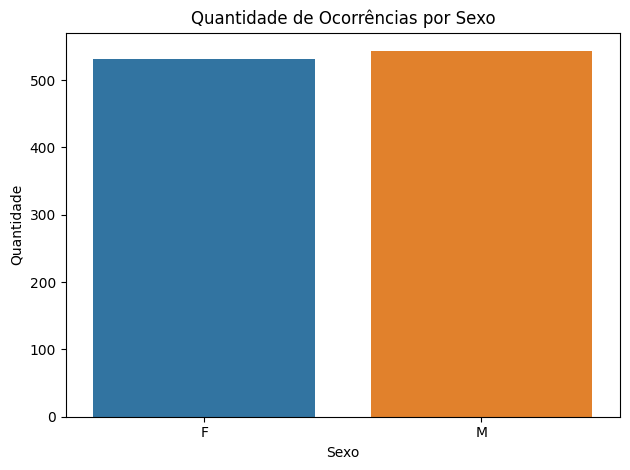

In [ ]:
T_dinmc_nt_redacao = df.pivot_table(index='TP_SEXO', values='NOTA_MEDIA', aggfunc='mean')
print(T_dinmc_nt_redacao)
# Plotar o gráfico de barras
sns.barplot(data=T_dinmc_nt_redacao, x=T_dinmc_nt_redacao.index, y='NOTA_MEDIA')

# Definir título e rótulos dos eixos
plt.title('Quantidade de Ocorrências por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.tight_layout()
plt.show()


# Nova seção

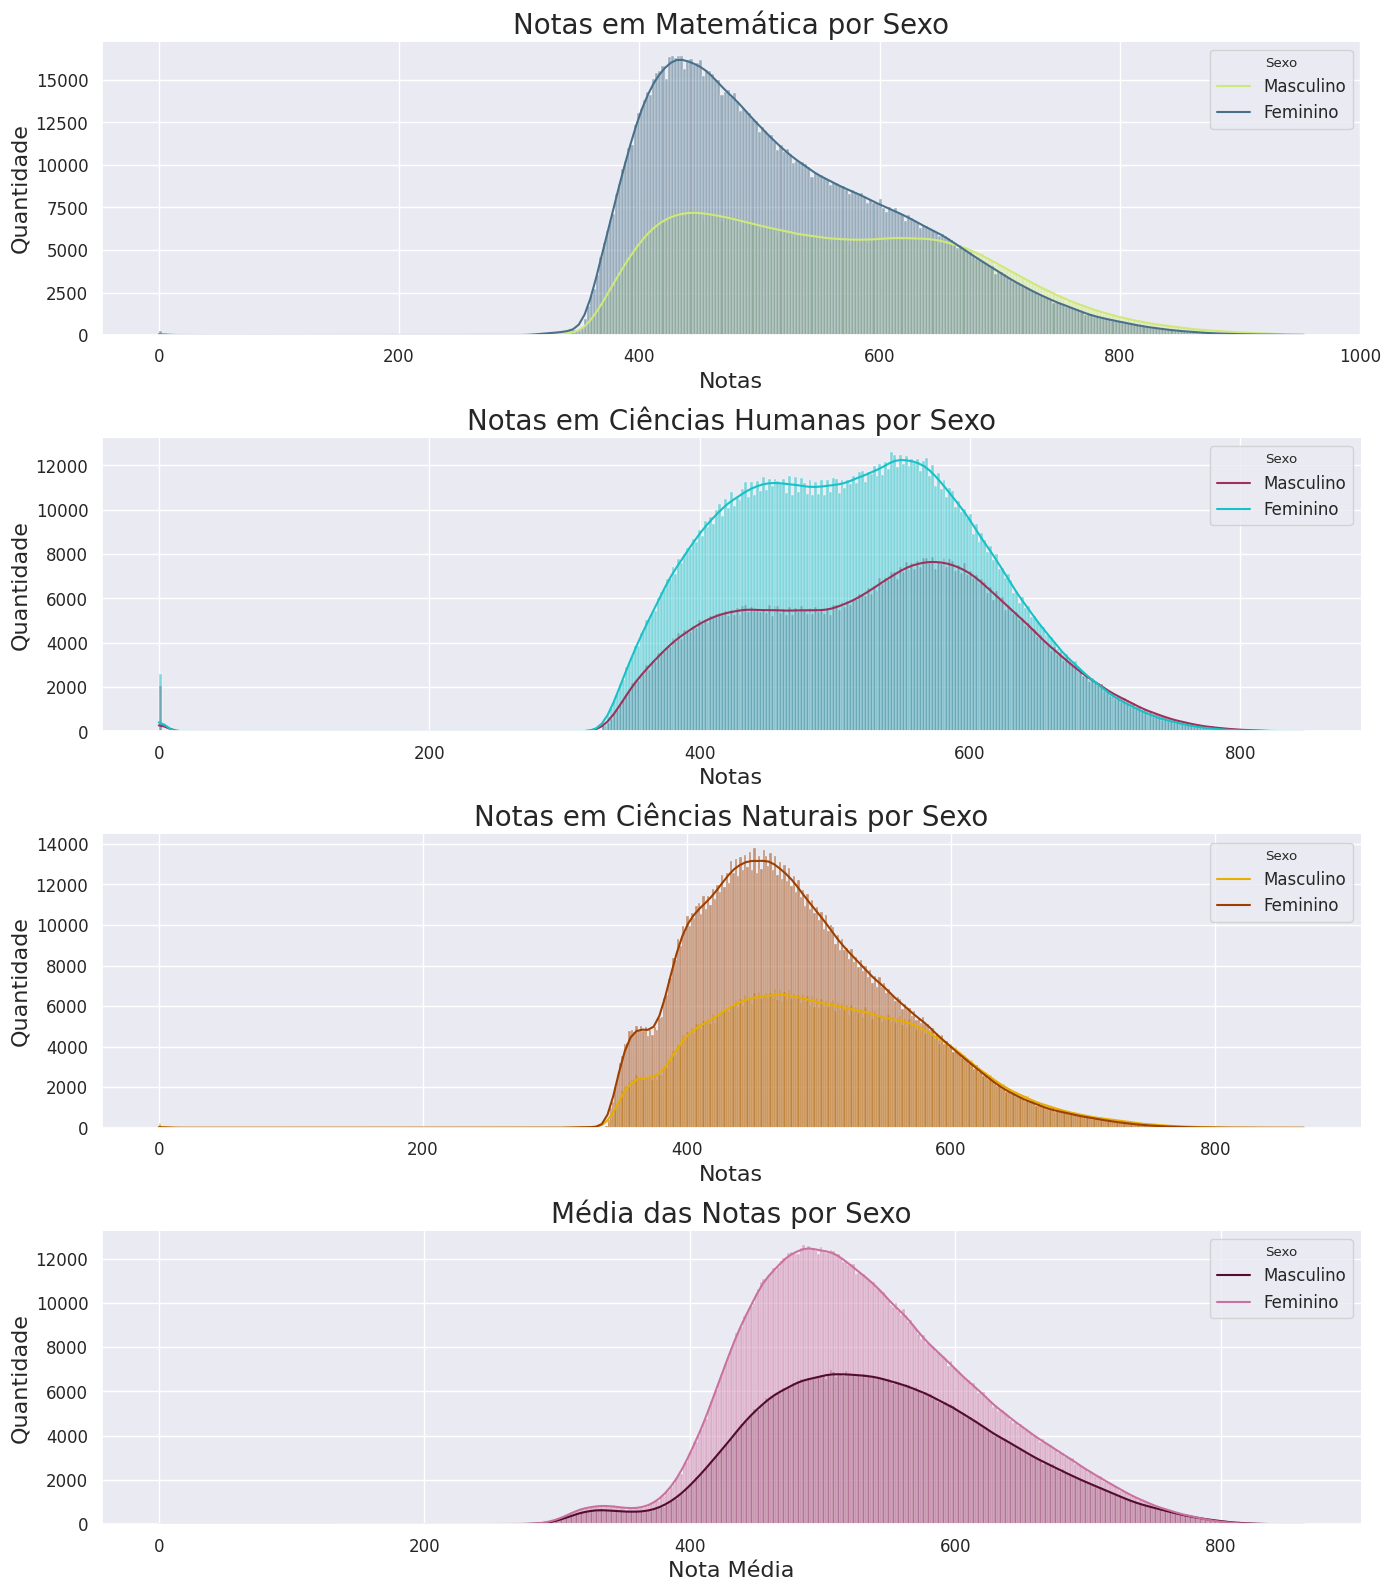

In [ ]:
# Definir a paleta de cores para cada sexo
cores1 = ["#49708a", "#cee879"]
cores2 = ["#FF6361", "#58508D"]
cores3 = ["#16c1c8", "#9c325c"]
cores4 = ["#9e3f00", "#e6ae00"]
cores5 = ["#c9729f", "#520c30"]

# Tamanho maior para todos os gráficos
fig, axs = plt.subplots(nrows=4, figsize=(14, 16))
plt.tight_layout()

# 1 - Notas em Matemática por Sexo
ax1 = axs[0]
sns.histplot(data=df, x="NU_NOTA_MT", kde=True, hue="TP_SEXO", ax=ax1, palette=cores1)
ax1.set_title('Notas em Matemática por Sexo', fontsize=20)
ax1.set_xlabel('Notas', fontsize=16)
ax1.set_ylabel('Quantidade', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(title='Sexo', labels=['Masculino', 'Feminino'], fontsize=12)
ax1.yaxis.grid(True)
sns.despine()

# 3 - Notas em Ciências Humanas por Sexo
ax3 = axs[1]
sns.histplot(data=df, x="NU_NOTA_CH", kde=True, hue="TP_SEXO", ax=ax3, palette=cores3)
ax3.set_title('Notas em Ciências Humanas por Sexo', fontsize=20)
ax3.set_xlabel('Notas', fontsize=16)
ax3.set_ylabel('Quantidade', fontsize=16)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax3.legend(title='Sexo', labels=['Masculino', 'Feminino'], fontsize=12)
ax3.yaxis.grid(True)
sns.despine()

# 4 - Notas em Ciências Naturais por Sexo
ax4 = axs[2]
sns.histplot(data=df, x="NU_NOTA_CN", kde=True, hue="TP_SEXO", ax=ax4, palette=cores4)
ax4.set_title('Notas em Ciências Naturais por Sexo', fontsize=20)
ax4.set_xlabel('Notas', fontsize=16)
ax4.set_ylabel('Quantidade', fontsize=16)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax4.legend(title='Sexo', labels=['Masculino', 'Feminino'], fontsize=12)
ax4.yaxis.grid(True)
sns.despine()

# 5 - Média das Notas por Sexo
ax5 = axs[3]
sns.histplot(data=df, x="NOTA_MEDIA", kde=True, hue="TP_SEXO", ax=ax5, palette=cores5)
ax5.set_title('Média das Notas por Sexo', fontsize=20)
ax5.set_xlabel('Nota Média', fontsize=16)
ax5.set_ylabel('Quantidade', fontsize=16)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax5.legend(title='Sexo', labels=['Masculino', 'Feminino'], fontsize=12)
ax5.yaxis.grid(True)
sns.despine()

plt.tight_layout()
plt.show()


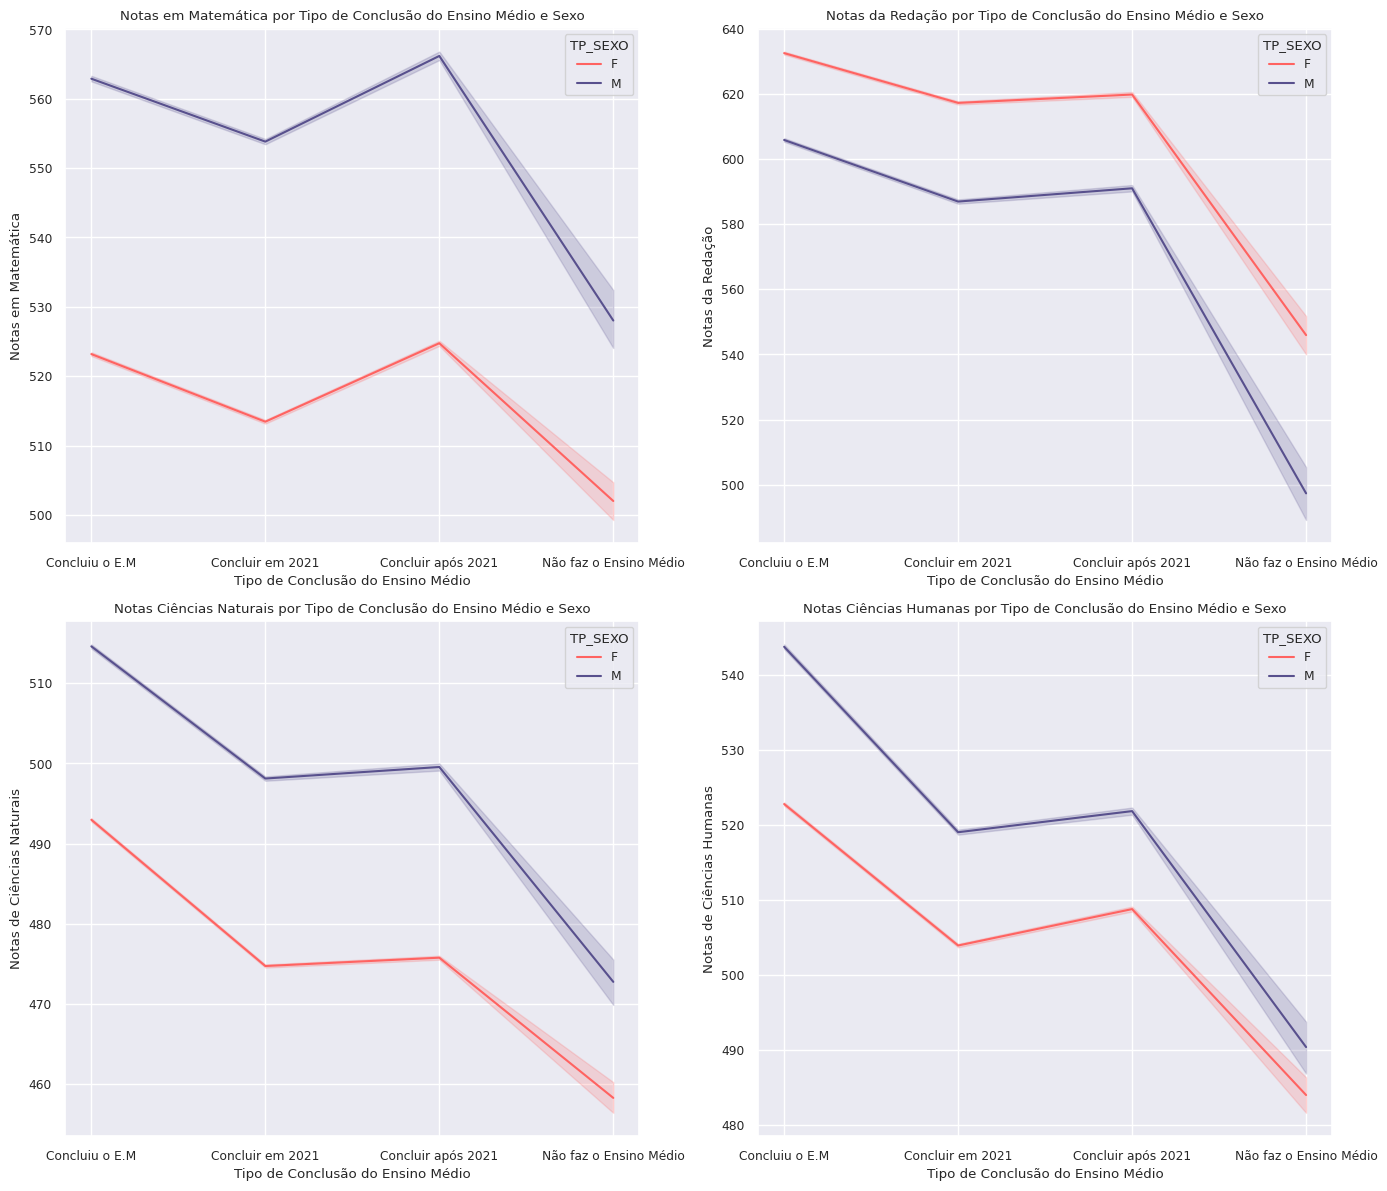

In [ ]:
# Definir a paleta de cores para cada sexo
cores1 = ["#49708a", "#cee879"]
cores2 = ["#FF6361", "#58508D"]
cores3 = ["#16c1c8", "#9c325c"]
cores4 = ["#9e3f00", "#e6ae00"]
cores5 = ["#c9729f", "#520c30"]

# Dicionário de conversão
chave_conclusao = {
    1: 'Concluiu o E.M',
    2: 'Concluir em 2021',
    3: 'Concluir após 2021',
    4: 'Não faz o Ensino Médio'
}

# Mapear os valores da coluna "TP_ST_CONCLUSAO" para as descrições correspondentes
df['TP_ST_CONCLUSAO_DESC'] = df['TP_ST_CONCLUSAO'].map(chave_conclusao)

# Tamanho da imagem e fonte
plt.figure(figsize=(14, 12))
sns.set(font_scale=0.8)

# Plotar o gráfico de linha para Notas em Matemática
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x="TP_ST_CONCLUSAO_DESC", y="NU_NOTA_MT", hue="TP_SEXO", palette=cores2)
plt.title('Notas em Matemática por Tipo de Conclusão do Ensino Médio e Sexo')
plt.xlabel('Tipo de Conclusão do Ensino Médio')
plt.ylabel('Notas em Matemática')

# Plotar o gráfico de linha para Notas da Redação
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x="TP_ST_CONCLUSAO_DESC", y="NU_NOTA_REDACAO", hue="TP_SEXO", palette=cores2)
plt.title('Notas da Redação por Tipo de Conclusão do Ensino Médio e Sexo')
plt.xlabel('Tipo de Conclusão do Ensino Médio')
plt.ylabel('Notas da Redação')

# Plotar o gráfico de linha para Notas de Ciências Naturais
plt.subplot(2, 2, 3)
sns.lineplot(data=df, x="TP_ST_CONCLUSAO_DESC", y="NU_NOTA_CN", hue="TP_SEXO", palette=cores2)
plt.title('Notas Ciências Naturais por Tipo de Conclusão do Ensino Médio e Sexo')
plt.xlabel('Tipo de Conclusão do Ensino Médio')
plt.ylabel('Notas de Ciências Naturais')

# Plotar o gráfico de linha para Notas de Ciências Humanas
plt.subplot(2, 2, 4)
sns.lineplot(data=df, x="TP_ST_CONCLUSAO_DESC", y="NU_NOTA_CH", hue="TP_SEXO", palette=cores2)
plt.title('Notas Ciências Humanas por Tipo de Conclusão do Ensino Médio e Sexo')
plt.xlabel('Tipo de Conclusão do Ensino Médio')
plt.ylabel('Notas de Ciências Humanas')

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


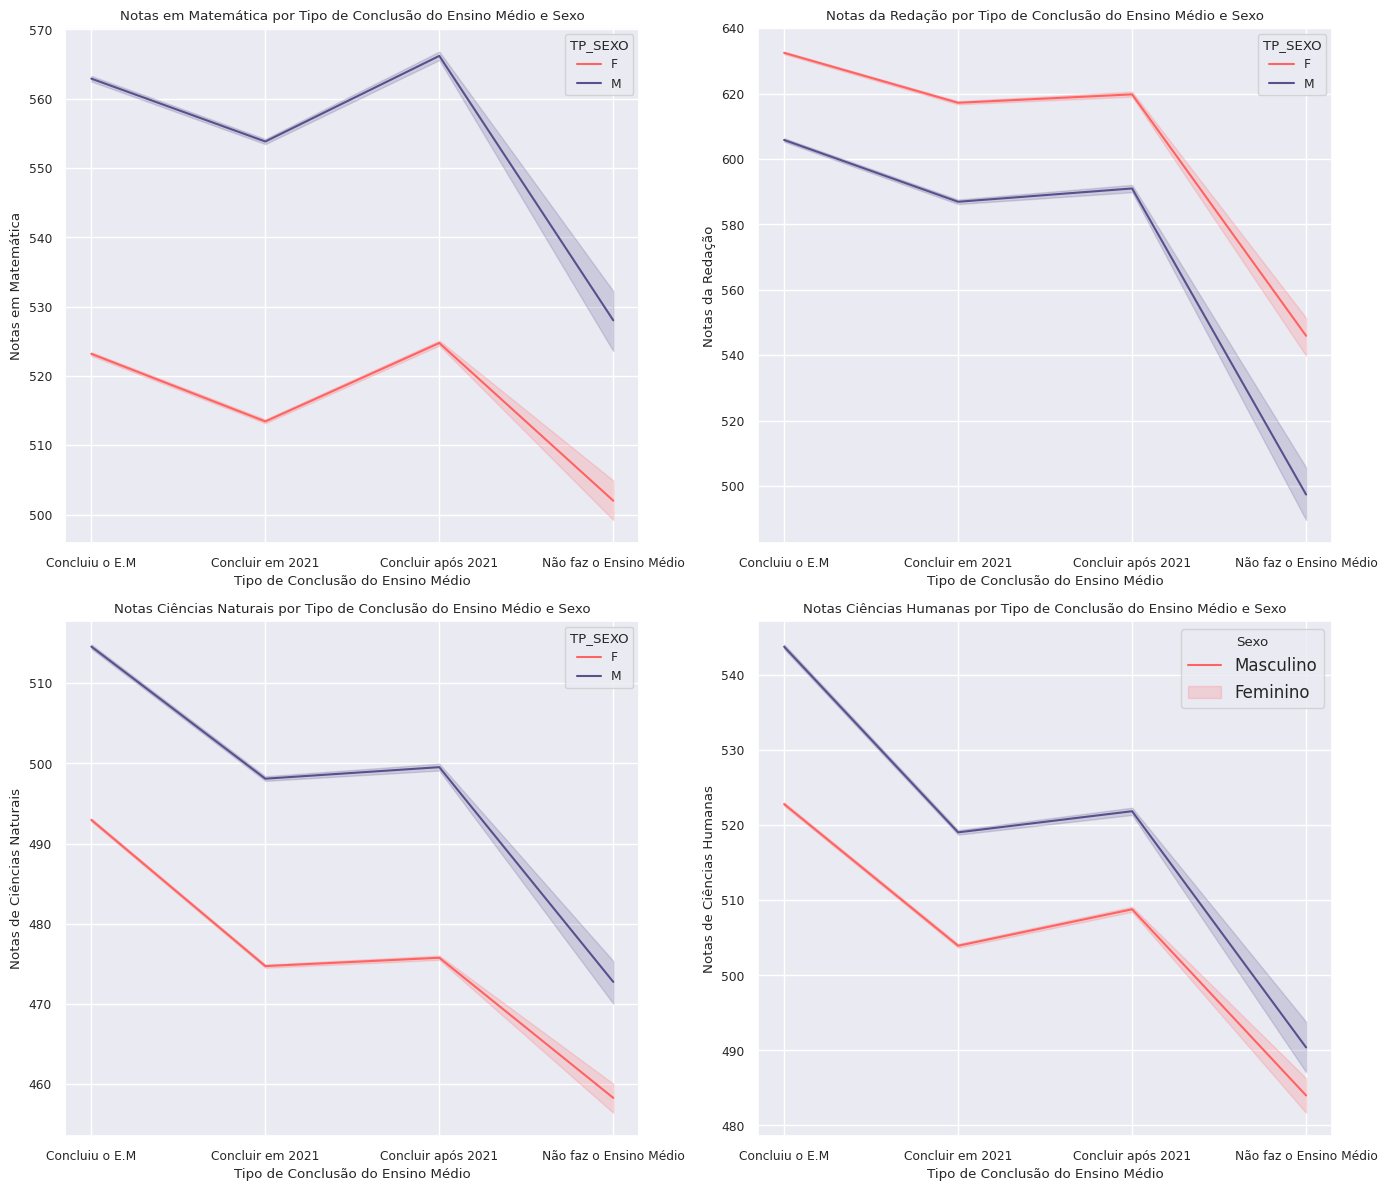

In [ ]:
# Definir a paleta de cores para cada sexo
cores1 = ["#49708a", "#cee879"]
cores2 = ["#FF6361", "#58508D"]
cores3 = ["#16c1c8", "#9c325c"]
cores4 = ["#9e3f00", "#e6ae00"]
cores5 = ["#c9729f", "#520c30"]

# Dicionário de conversão
chave_conclusao = {
    1: 'Concluiu o E.M',
    2: 'Concluir em 2021',
    3: 'Concluir após 2021',
    4: 'Não faz o Ensino Médio'
}

# Mapear os valores da coluna "TP_ST_CONCLUSAO" para as descrições correspondentes
df['TP_ST_CONCLUSAO_DESC'] = df['TP_ST_CONCLUSAO'].map(chave_conclusao)

# Tamanho da imagem e fonte
plt.figure(figsize=(14, 12))
sns.set(font_scale=0.8)

# Plotar o gráfico de linha para Notas em Matemática
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x="TP_ST_CONCLUSAO_DESC", y="NU_NOTA_MT", hue="TP_SEXO", palette=cores2)
plt.title('Notas em Matemática por Tipo de Conclusão do Ensino Médio e Sexo')
plt.xlabel('Tipo de Conclusão do Ensino Médio')
plt.ylabel('Notas em Matemática')

# Plotar o gráfico de linha para Notas da Redação
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x="TP_ST_CONCLUSAO_DESC", y="NU_NOTA_REDACAO", hue="TP_SEXO", palette=cores2)
plt.title('Notas da Redação por Tipo de Conclusão do Ensino Médio e Sexo')
plt.xlabel('Tipo de Conclusão do Ensino Médio')
plt.ylabel('Notas da Redação')

# Plotar o gráfico de linha para Notas de Ciências Naturais
plt.subplot(2, 2, 3)
sns.lineplot(data=df, x="TP_ST_CONCLUSAO_DESC", y="NU_NOTA_CN", hue="TP_SEXO", palette=cores2)
plt.title('Notas Ciências Naturais por Tipo de Conclusão do Ensino Médio e Sexo')
plt.xlabel('Tipo de Conclusão do Ensino Médio')
plt.ylabel('Notas de Ciências Naturais')

# Plotar o gráfico de linha para Notas de Ciências Humanas
plt.subplot(2, 2, 4)
sns.lineplot(data=df, x="TP_ST_CONCLUSAO_DESC", y="NU_NOTA_CH", hue="TP_SEXO", palette=cores2)
plt.title('Notas Ciências Humanas por Tipo de Conclusão do Ensino Médio e Sexo')
plt.xlabel('Tipo de Conclusão do Ensino Médio')
plt.ylabel('Notas de Ciências Humanas')

# Adicionar legenda
plt.legend(title='Sexo', labels=['Masculino', 'Feminino'], fontsize=12)

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()


<ipython-input-52-89cc5815f067>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TP_COR_RACA_DESC'] = df_filtered['TP_COR_RACA'].map(chave_raca)


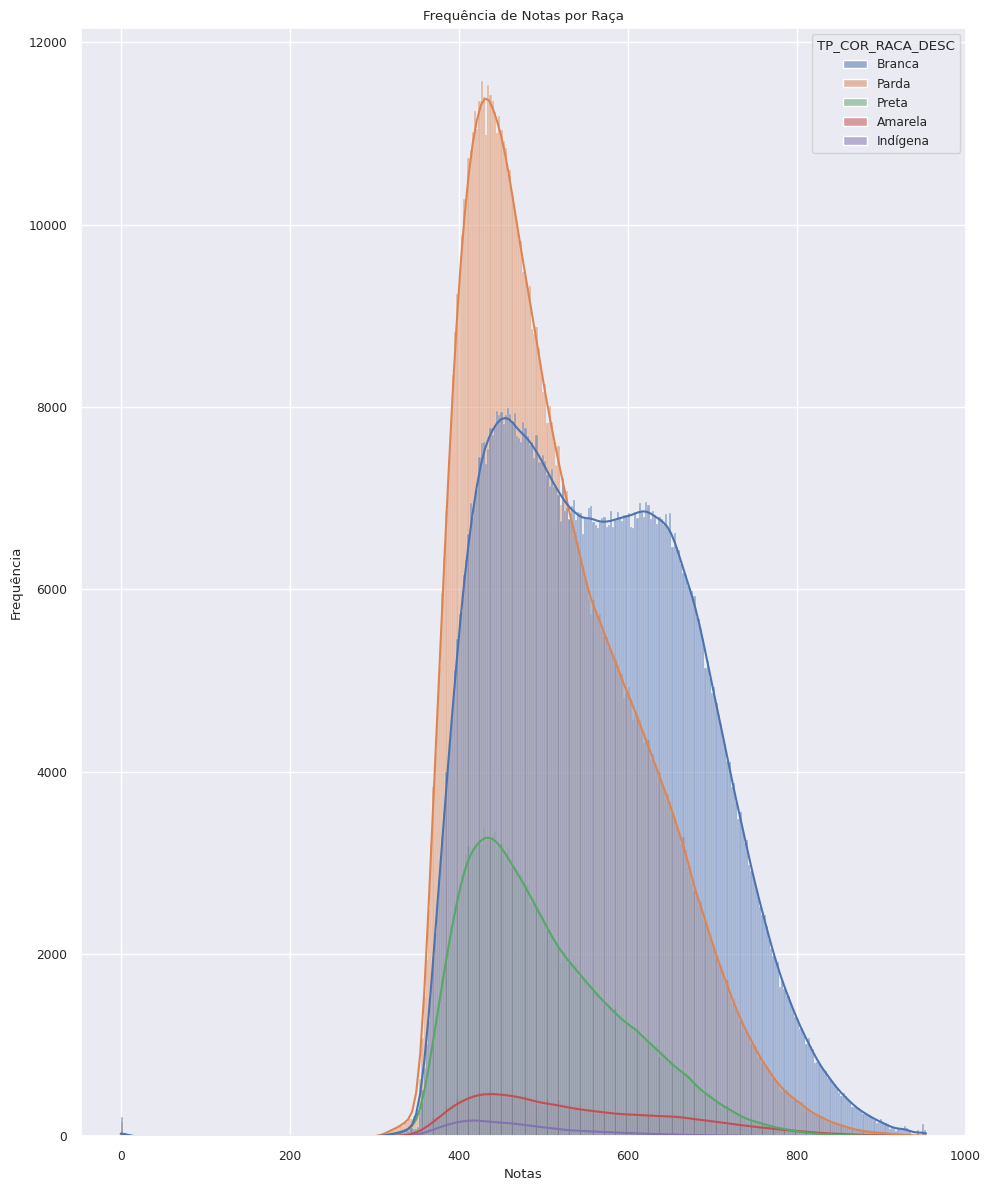

In [ ]:
# Filtrar o DataFrame removendo as categorias indesejadas
df_filtered = df[(df['TP_COR_RACA'] != 0) & (df['TP_COR_RACA'] != 6)]

# Dicionário de conversão
chave_raca = {
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
}

# Tamanho da imagem
plt.figure(figsize=(10, 12))

# Mapear os valores da coluna "TP_COR_RACA" para as descrições correspondentes
df_filtered['TP_COR_RACA_DESC'] = df_filtered['TP_COR_RACA'].map(chave_raca)

# Plotar o gráfico de histograma
sns.histplot(data=df_filtered, x="NU_NOTA_MT", kde=True, hue="TP_COR_RACA_DESC")

# Definir título e rótulos dos eixos
plt.title('Frequência de Notas por Raça')
plt.xlabel('Notas')
plt.ylabel('Frequência')

# Obter as legendas atuais e alterar seus rótulos
handles, labels = plt.gca().get_legend_handles_labels()
labels = [chave_raca[int(label)] for label in labels]

# Exibir o gráfico
plt.tight_layout()
plt.show()


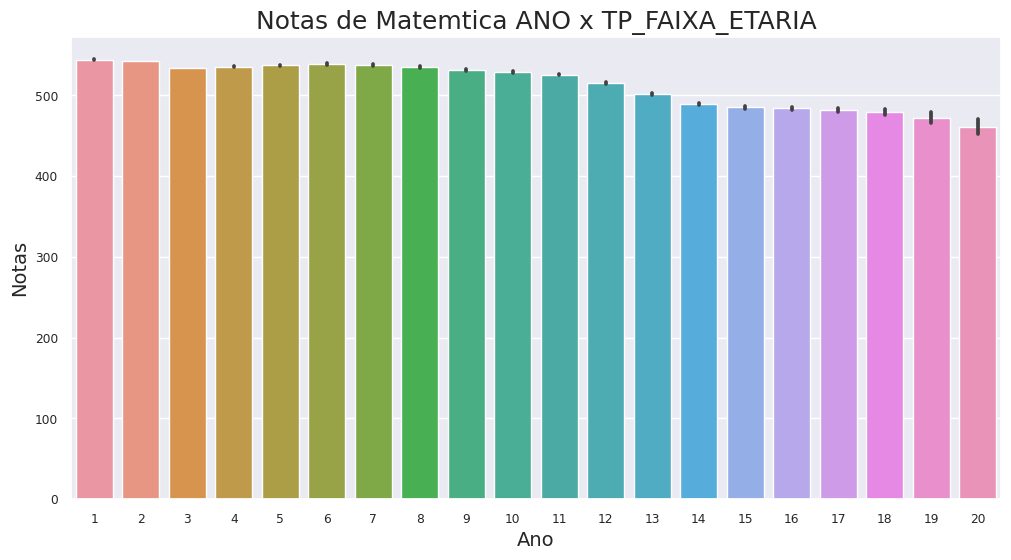

In [ ]:
ax = sns.barplot(data=df, x="TP_FAIXA_ETARIA",y = "NU_NOTA_MT")
ax.figure.set_size_inches(12,6)
ax.set_title('Notas de Matemtica ANO x TP_FAIXA_ETARIA', fontsize=18)
ax.set_xlabel('Ano', fontsize = 14)
ax.set_ylabel('Notas', fontsize = 14)
ax = ax

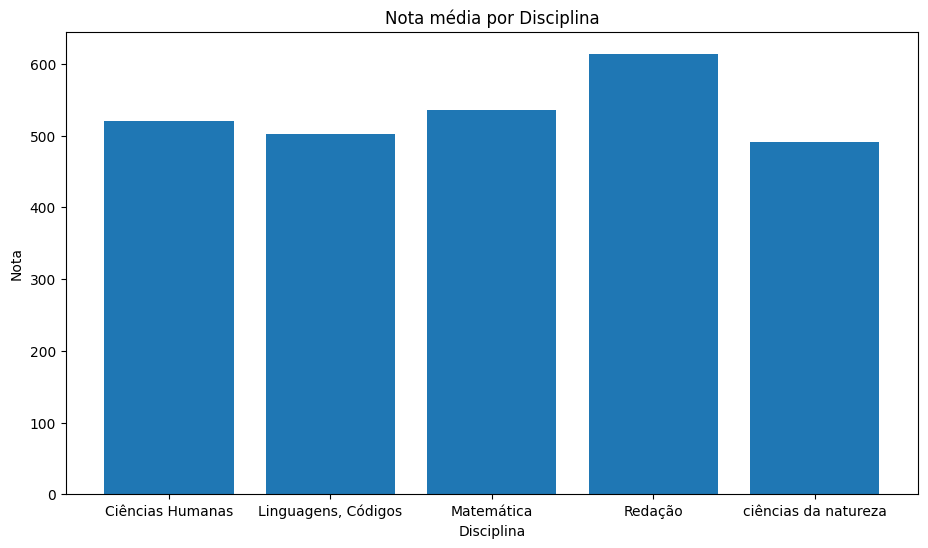

In [ ]:
notas_medias={'ciências da natureza':np.mean(df['NU_NOTA_CN']),
                                               'Ciências Humanas':np.mean(df['NU_NOTA_CH']),
                                               'Linguagens, Códigos':np.mean(df['NU_NOTA_LC']),
                                               'Matemática':np.mean(df['NU_NOTA_MT']),
                                               'Redação':np.mean(df['NU_NOTA_REDACAO'])}

lists = sorted(notas_medias.items())

plt.figure(figsize=(11,6))
x1, y1 = zip(*lists) 
plt.bar(x1, y1)
plt.title('Nota média por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Nota')
plt.show()


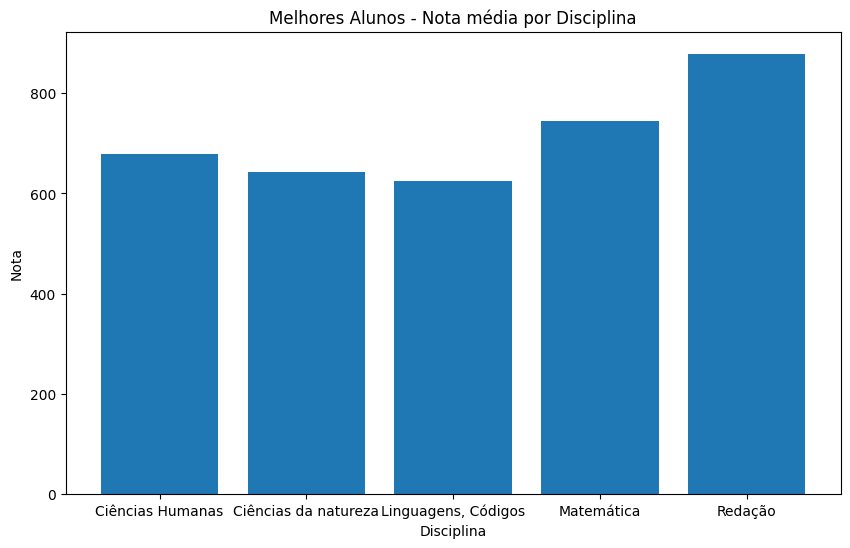

In [ ]:
notas_medias_melhores = {'Ciências da natureza': np.mean(df_melhores_notas['NU_NOTA_CN']),
                         'Ciências Humanas': np.mean(df_melhores_notas['NU_NOTA_CH']),
                         'Linguagens, Códigos': np.mean(df_melhores_notas['NU_NOTA_LC']),
                         'Matemática': np.mean(df_melhores_notas['NU_NOTA_MT']),
                         'Redação': np.mean(df_melhores_notas['NU_NOTA_REDACAO'])}


lists = sorted(notas_medias_melhores.items())




x2, y2 = zip(*lists)
plt.figure(figsize=(10,6))


plt.bar(x2, y2)
plt.title('Melhores Alunos - Nota média por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Nota')
plt.show()



<ipython-input-99-bf6bdd622916>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.axes(sns.distplot(df.NOTA_MEDIA))


Text(0.5, 0, 'Nota Média')

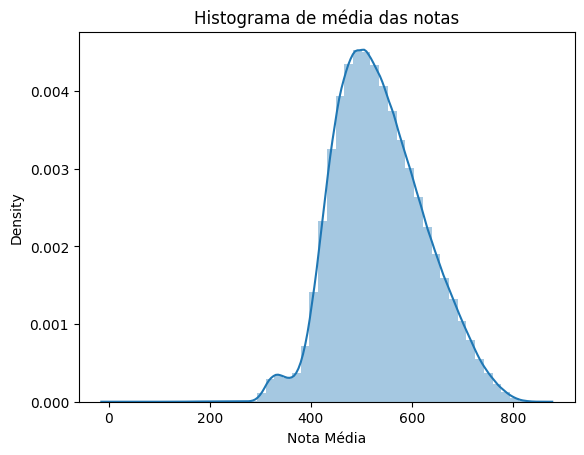

In [ ]:
plt.axes(sns.distplot(df.NOTA_MEDIA))
plt.title('Histograma de média das notas')
plt.xlabel('Nota Média')

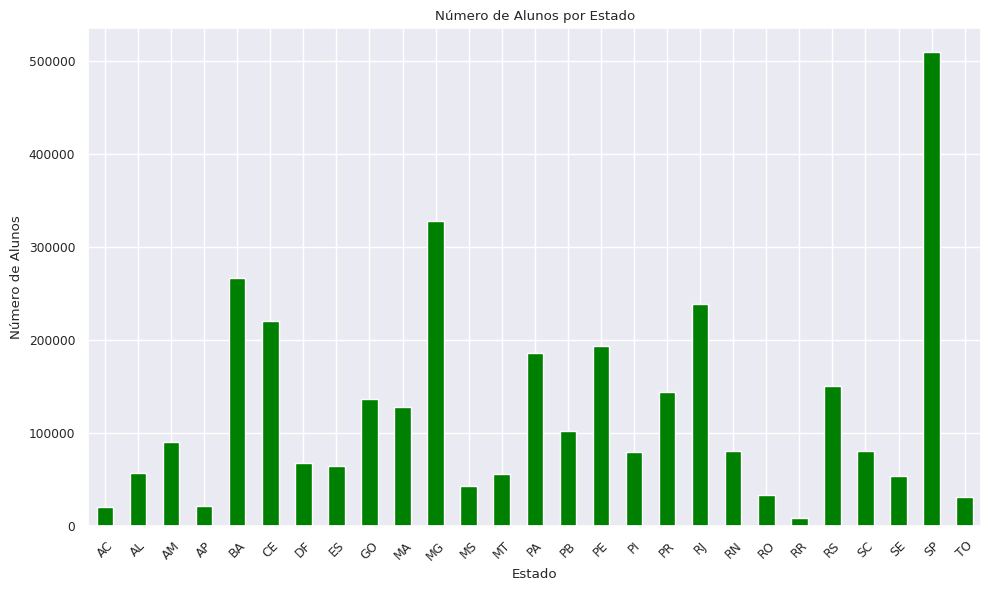

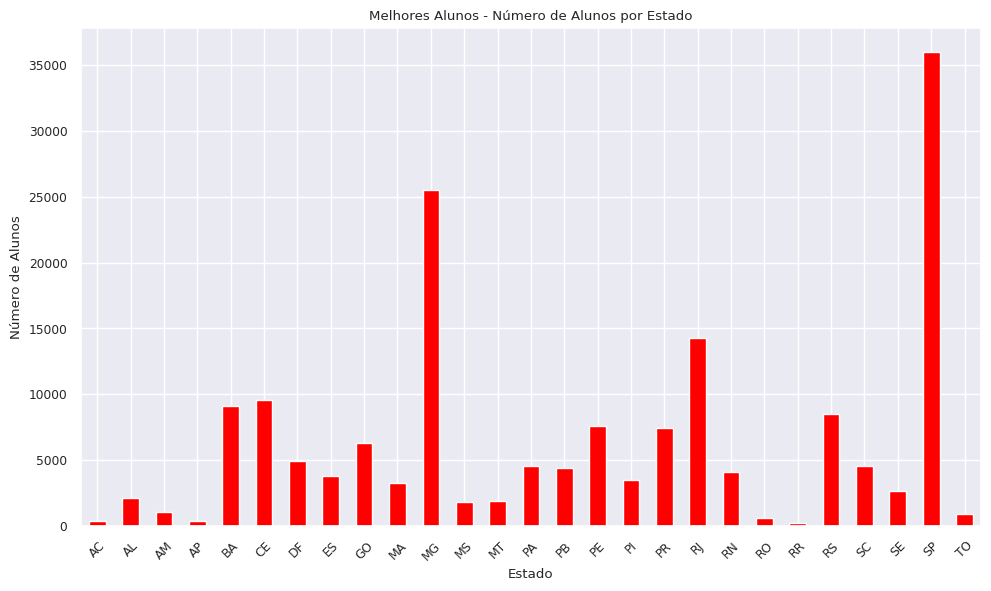

In [ ]:
# Gráfico de número de alunos por estado
plt.figure(figsize=(10, 6))
df['SG_UF_PROVA'].value_counts().sort_index().plot.bar(color='green')
plt.title('Número de Alunos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()
plt.show()

# Gráfico de melhores alunos por estado
plt.figure(figsize=(10, 6))
df_melhores_notas['SG_UF_PROVA'].value_counts().sort_index().plot.bar(color='red')
plt.title('Melhores Alunos - Número de Alunos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Alunos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()
plt.show()


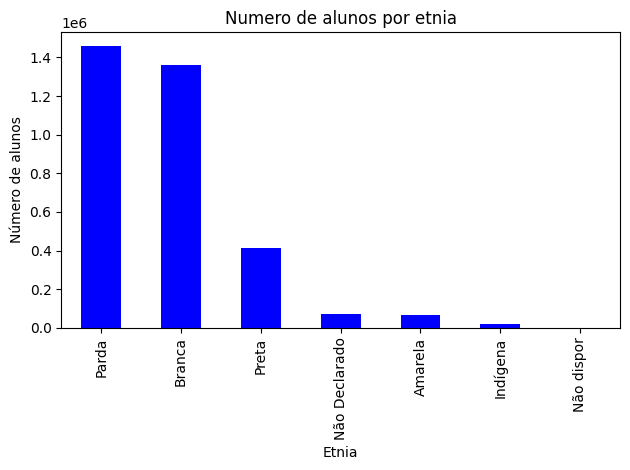

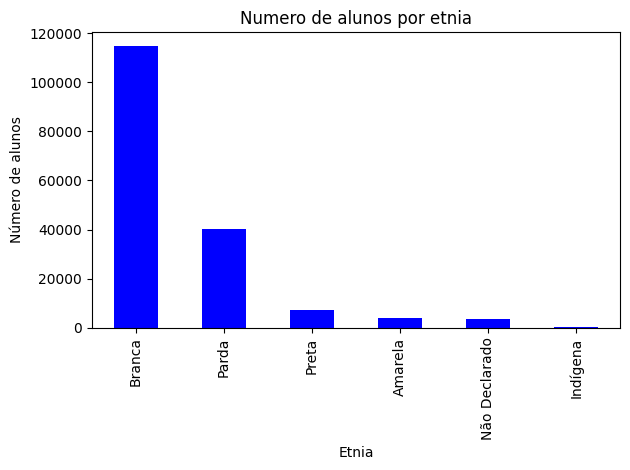

In [ ]:
#numero por etnia
df_TP_COR_RACA = pd.Series(df.TP_COR_RACA, dtype='category').cat.rename_categories({3:'Parda', 2:'Preta', 1:'Branca', 0:'Não Declarado', 4:'Amarela', 5:'Indígena', 6:'Não dispor'})
df_TP_COR_RACA.value_counts().plot.bar(color='blue')
plt.title('Numero de alunos por etnia')
plt.xlabel('Etnia')
plt.ylabel('Número de alunos')
plt.tight_layout()
plt.show()

#Melhores alunos - numero por etnia
df_TP_COR_RACA_m = pd.Series(df_melhores_notas.TP_COR_RACA, dtype='category').cat.rename_categories({3:'Parda', 2:'Preta', 1:'Branca', 0:'Não Declarado', 4:'Amarela', 5:'Indígena', 6:'Não dispor'})
df_TP_COR_RACA_m.value_counts().plot.bar(color='blue')
plt.title('Numero de alunos por etnia')
plt.xlabel('Etnia')
plt.ylabel('Número de alunos')
plt.tight_layout()
plt.show()


<ipython-input-35-02e9221ab196>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cores = plt.cm.get_cmap('viridis', len(estados))


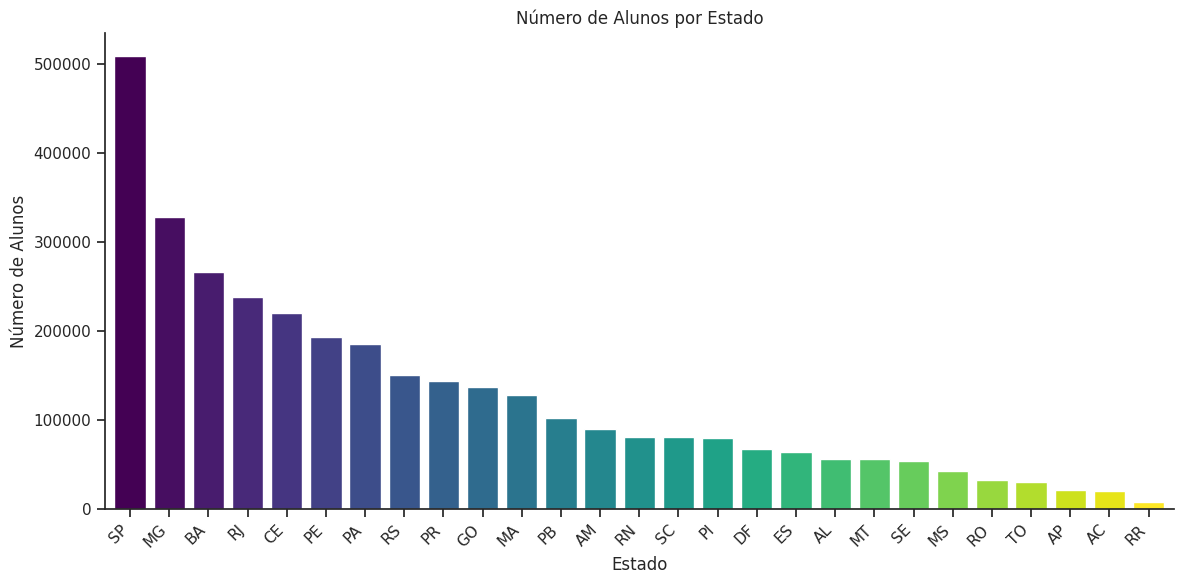

In [ ]:
# Ordenar os estados pelo número de alunos em ordem decrescente
estados = df['SG_UF_PROVA'].value_counts().sort_values(ascending=False)

# Definir paleta de cores com gradiente
cores = plt.cm.get_cmap('viridis', len(estados))

# Definir tamanho da figura
plt.figure(figsize=(12, 6))

# Plotar o gráfico de barras com gradiente de cores
estados.plot.bar(color=cores(range(len(estados))), width=0.8)

# Definir título e rótulos dos eixos
plt.title('Número de Alunos por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Alunos')

# Definir rotação e alinhamento dos rótulos do eixo x
plt.xticks(rotation=45, ha='right')

# Remover bordas desnecessárias
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar margens
plt.tight_layout()

# Exibir o gráfico
plt.show()



In [ ]:
#notas por Etnia
df['TP_COR_RACA_c'] = df_TP_COR_RACA
sns.boxplot(x = 'TP_COR_RACA_c', y = 'NOTA_MEDIA', data = df)
plt.title("Nota média por raça")
plt.xlabel('Etnia')
plt.ylabel('Nota Média')

NameError: ignored

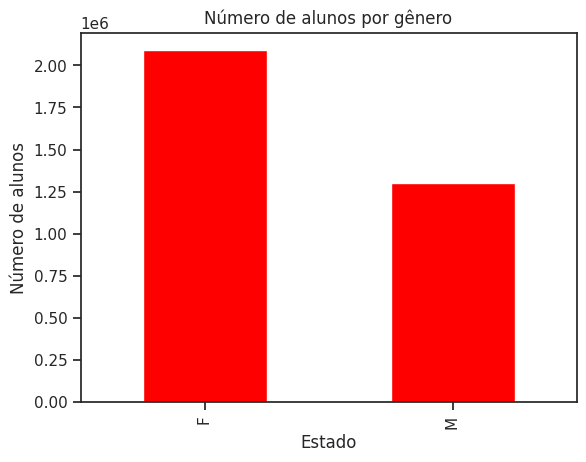

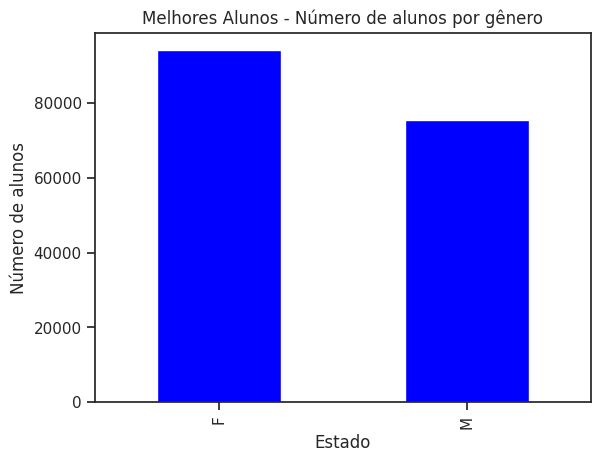

In [ ]:
#numero de alunos por sexo
color_choice = 'blue' if df.TP_SEXO.value_counts().idxmax() == 'M' else 'red'
df.TP_SEXO.value_counts().plot.bar(color= color_choice)
df.TP_SEXO.value_counts('M').plot.bar(color='blue')
plt.title('Número de alunos por gênero')
plt.xlabel('Estado')
plt.ylabel('Número de alunos')
plt.show()

 #Melhores alunos - numero de alunos por sexo
df_melhores_notas.TP_SEXO.value_counts().plot.bar(color='blue')
plt.title('Melhores Alunos - Número de alunos por gênero')
plt.xlabel('Estado')
plt.ylabel('Número de alunos')
plt.show()



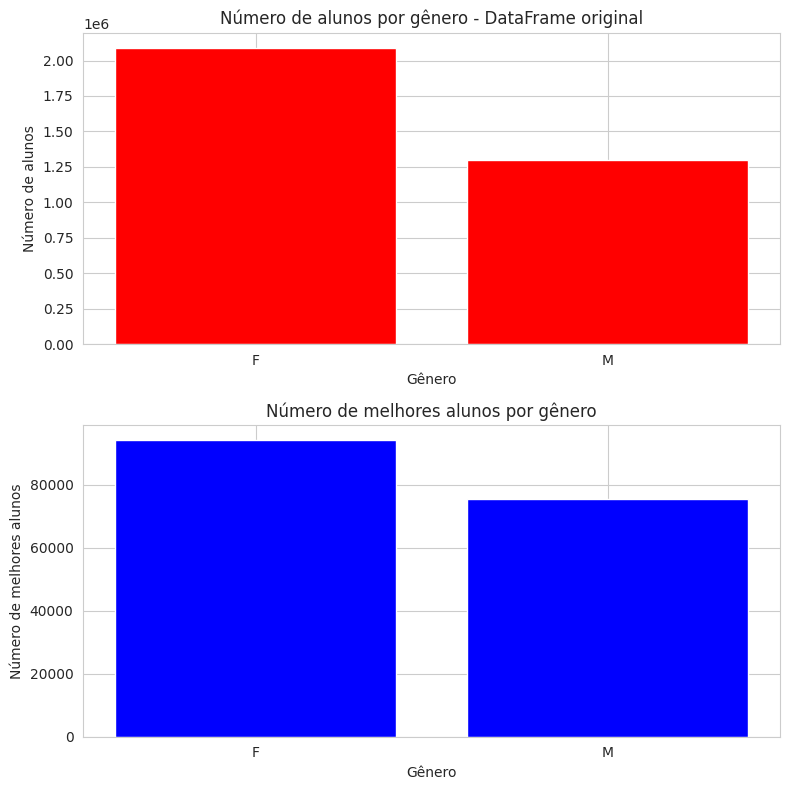

In [ ]:
import matplotlib.pyplot as plt

# Número de alunos por sexo (DataFrame original)
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

color_choice = 'blue' if df.TP_SEXO.value_counts().idxmax() == 'M' else 'red'

axs[0].bar(df.TP_SEXO.value_counts().index, df.TP_SEXO.value_counts(), color=color_choice)
axs[0].set_title('Número de alunos por gênero - DataFrame original')
axs[0].set_xlabel('Gênero')
axs[0].set_ylabel('Número de alunos')

# Número de melhores alunos por sexo
axs[1].bar(df_melhores_notas.TP_SEXO.value_counts().index, df_melhores_notas.TP_SEXO.value_counts(), color='blue')
axs[1].set_title('Número de melhores alunos por gênero')
axs[1].set_xlabel('Gênero')
axs[1].set_ylabel('Número de melhores alunos')

plt.tight_layout()
plt.show()


In [ ]:
T_dinmc_nt_redacao = df.pivot_table(index='TP_SEXO', values='NU_NOTA_MEDIA', aggfunc='sum')
T_dinmc_nt_redacao 

KeyError: ignored